In [2]:
def reverse_complement(text: str) -> str:
    """
    Assume the input is a string of A, C, G, T, and return the reverse complement of the input string
    >>> reverse_complement('AAAACCCGGT')
    'ACCGGGTTTT'
    """
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return ''.join(complement[n] for n in text.upper()[::-1])

In [3]:
def read_fasta(file_path) -> dict:
    """
    Reads a FASTA file and returns a dictionary where keys are the headers (chromosomes)
    and values are the corresponding sequences.
    """
    with open(file_path, 'r') as file:
        sequences = {}
        header = None # Initiating header to None
        sequence = []

        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if header:
                    sequences[header] = ''.join(sequence)
                header = line[1:]  # Remove '>' character
                sequence = []
            else:
                sequence.append(line.upper())
        
        # Add the last sequence
        if header:
            sequences[header] = ''.join(sequence)

    return sequences

In [ ]:
def main():
    import pandas as pd
    import matplotlib.pyplot as plt
    from collections import Counter

    fasta_reads = read_fasta("seq_array_all.fa")
    # Create a dict of all kmers from the kmer_list
    #kmer_df = pd.read_csv("annotations.csv", header=None, names=["kmer", "seq"])
    #kmer_dict = pd.Series(kmer_df.seq.values, index=kmer_df.kmer).to_dict()
    #kmer_dict = {kmer: seq.upper() for kmer, seq in kmer_dict.items()} # All the kmers are 10 nt long
    idx1_dict = {"T08": "GGAACATGTATCTAA", "T09": "TGACCGTCCACGGCC", "T10": "CGGTAGGGTGTAACC"}
    idx2_dict = {"T08": "GGAGCAACGACCCAG", "T09": "GGTTGCAATGGGTGA", "T10": "GGGCCTGACTGCTTA"}
    idx3_dict = {"T08": "ACTACTATTC", "T09": "CAAATAGTAG", "T10": "ATTAGAAATA"}
    reads = [value for value in fasta_reads.values()] + [reverse_complement(value) for value in fasta_reads.values()]

    def find_location(read: str, substring: str) -> list:
        """
        Find the location of the substring in the read
        """
        length = len(substring)
        locations = []
        for i in range(len(read) - length + 1):
            if read[i:i+length] == substring:
                locations.append(i)
        return locations
    dist1 = []
    dist2 = []
    for read in reads:
        idx1_loc = {}
        idx2_loc = {}
        idx3_loc = {}

        for key, value in idx1_dict.items():
            idx1_loc[key] = find_location(read, value)
        for key, value in idx2_dict.items():
            idx2_loc[key] = find_location(read, value)
        for key, value in idx3_dict.items():
            idx3_loc[key] = find_location(read, value)
        
        # First, find the distances between indices that came from the same construct
        same_construct_distances = []
        for key, value in idx1_loc.items():
            distances = []
            for idx1 in value:
                dist2to1 = [idx2-idx1 for idx2 in idx2_loc[key] if idx2-idx1 > 0 and idx2-idx1 < 2000]
                distances += dist2to1
                dist3to1 = [idx3-idx1 for idx3 in idx3_loc[key] if idx3-idx1 > 0 and idx3-idx1 < 2000]
                distances += dist3to1
            same_construct_distances += distances
        dist1 += same_construct_distances

        # Then, find the distances between indices that came from different constructs
        diff_construct_distances = []
        for key, value in idx1_loc.items():
            distances = []
            other_idx2 = []
            other_idx3 = []
            for key2, value2 in idx2_loc.items():
                if key != key2:
                    other_idx2 += value2
            for key3, value3 in idx3_loc.items():
                if key != key3:
                    other_idx3 += value3
            for idx1 in value:
                dist_2to1 = [idx2-idx1 for idx2 in other_idx2 if idx2-idx1 > 0 and idx2-idx1 < 2000]
                distances += dist_2to1
                dist_3to1 = [idx3-idx1 for idx3 in other_idx3 if idx3-idx1 > 0 and idx3-idx1 < 2000]
                distances += dist_3to1
            diff_construct_distances += distances
        dist2 += diff_construct_distances
    
    plt.hist(dist1, bins=100, alpha=0.5, label='Same construct')
    plt.hist(dist2, bins=100, alpha=0.5, label='Different construct')
    plt.legend(loc='upper right')
    plt.xlabel('Distance (nt)')
    plt.ylabel('Count')
    plt.yscale("log")
    plt.xlim(0, 2000)
    plt.ylim(0, 100000)
    #plt.title('Distance from index 1 to the closest index 2 or index 3 in the same direction')
    #plt.savefig("array_analysis-test.png", dpi=500)


    return dist1, dist2

if __name__ == "__main__":
    main()

42084 842 33873 4540 34426 4088


/tmp/ipykernel_210598/3984239917.py:168: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[0].set_ylim(0, 100000)
/tmp/ipykernel_210598/3984239917.py:179: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[1].set_ylim(0, 100000)


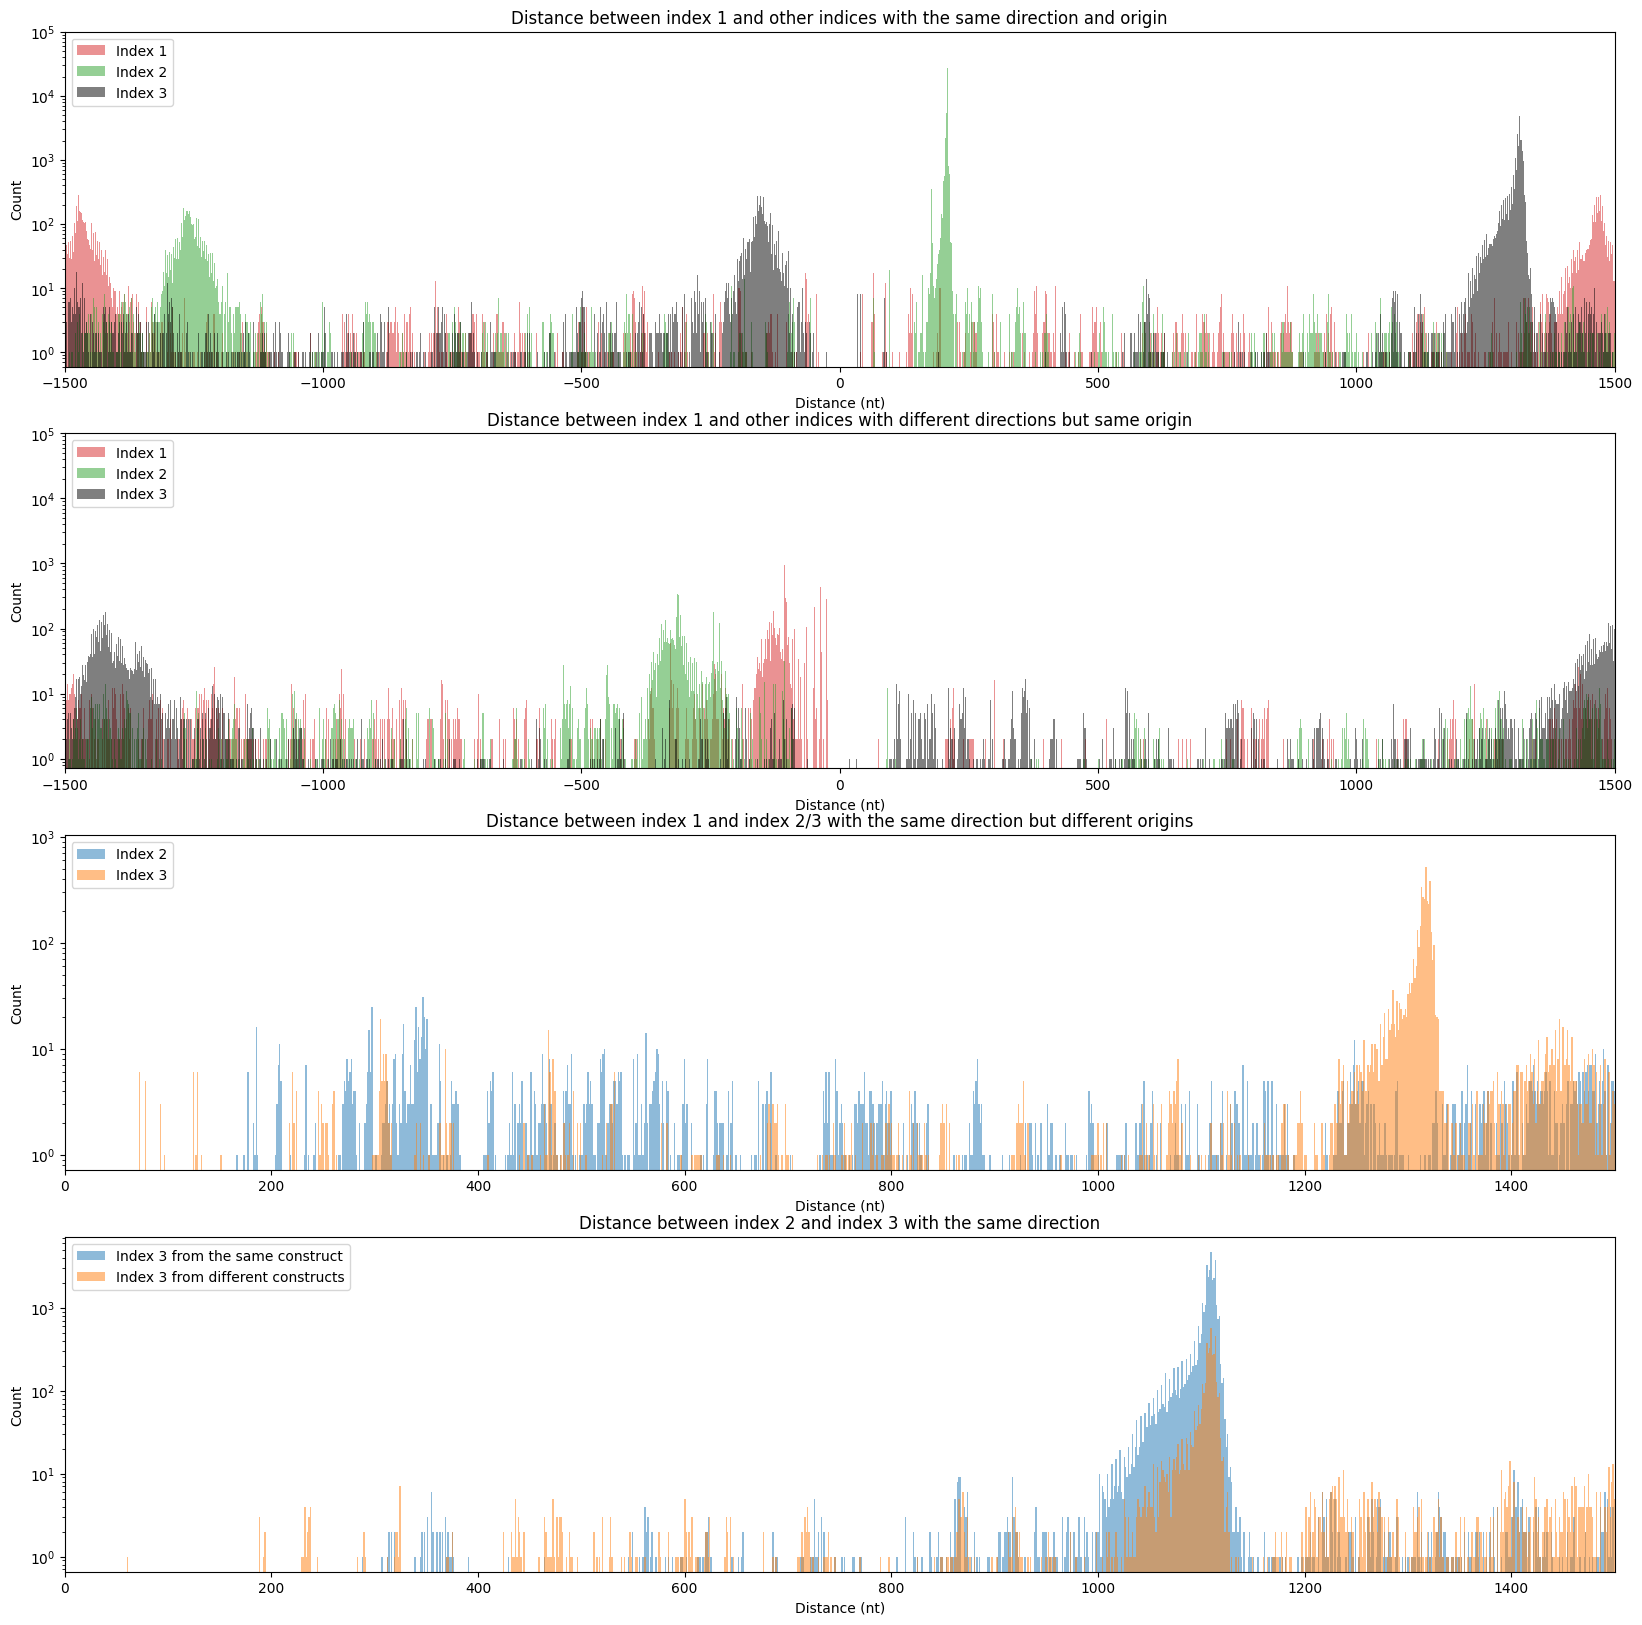

In [12]:
def main():
    import pandas as pd
    import matplotlib.pyplot as plt
    from collections import Counter, defaultdict

    reads = [read for read in read_fasta("seq_array_all.fa").values()]
    # Create a dict of all kmers from the kmer_list
    #kmer_df = pd.read_csv("annotations.csv", header=None, names=["kmer", "seq"])
    #kmer_dict = pd.Series(kmer_df.seq.values, index=kmer_df.kmer).to_dict()
    #kmer_dict = {kmer: seq.upper() for kmer, seq in kmer_dict.items()} # All the kmers are 10 nt long
    idx1 = {"T08": "GGAACATGTATCTAA", "T09": "TGACCGTCCACGGCC", "T10": "CGGTAGGGTGTAACC"}
    idx2 = {"T08": "GGAGCAACGACCCAG", "T09": "GGTTGCAATGGGTGA", "T10": "GGGCCTGACTGCTTA"}
    idx3 = {"T08": "ACTACTATTC", "T09": "CAAATAGTAG", "T10": "ATTAGAAATA"}
    constructs = ["T08", "T09", "T10"]

    def find_all_occurrences(read: str, substring: str) -> list:
        """
        Assume the input is a string of read and a shorter substring, return all the locations of the substring in the read
        >>> find_all_occurrences('GATATATGCATATACTT', 'ATAT')
        [1, 3, 9]
        """
        start = 0
        locations = []
        while True:
            start = read.find(substring, start)
            if start == -1:  # No more occurrences found
                break
            locations.append(start)
            start += 1  # Move past this occurrence
        return locations
    
    toidx1_same = []
    toidx1_diff = []
    toidx2_same = []
    toidx2_diff = []
    toidx3_same = []
    toidx3_diff = []
    recomb_idx1 = []
    recomb_idx2 = []
    recomb_idx3 = []

    idx2_3_same = []
    recomb_idx2_3 = []

    for read in reads:
        # Record all the locations of the indices with direction
        idx1_loc_F = {}
        idx2_loc_F = {}
        idx3_loc_F = {}
        idx1_loc_R = {}
        idx2_loc_R = {}
        idx3_loc_R = {}
        idx1_oth_F = {"T08": [], "T09": [], "T10": []}
        idx1_oth_R = {"T08": [], "T09": [], "T10": []}
        idx2_oth_F = {"T08": [], "T09": [], "T10": []}
        idx2_oth_R = {"T08": [], "T09": [], "T10": []}
        idx3_oth_F = {"T08": [], "T09": [], "T10": []}
        idx3_oth_R = {"T08": [], "T09": [], "T10": []}


        for construct in constructs:
            idx1_loc_F[construct] = find_all_occurrences(read, idx1[construct])
            idx2_loc_F[construct] = find_all_occurrences(read, idx2[construct])
            idx3_loc_F[construct] = find_all_occurrences(read, idx3[construct])
            idx1_loc_R[construct] = find_all_occurrences(read, reverse_complement(idx1[construct]))
            idx2_loc_R[construct] = find_all_occurrences(read, reverse_complement(idx2[construct]))
            idx3_loc_R[construct] = find_all_occurrences(read, reverse_complement(idx3[construct]))
        
        for construct in constructs:
            other_constructs = [c for c in constructs if c != construct]
            for c in other_constructs:
                idx1_oth_F[construct] += idx1_loc_F[c]
                idx1_oth_R[construct] += idx1_loc_R[c]
                idx2_oth_F[construct] += idx2_loc_F[c]
                idx2_oth_R[construct] += idx2_loc_R[c]
                idx3_oth_F[construct] += idx3_loc_F[c]
                idx3_oth_R[construct] += idx3_loc_R[c]

                
        
        # First, find the distances between index 1 and index 2 or index 3 that came from the same construct

        for construct in constructs:
            # The distance between index 1 and index 2, index 3 in the same or different directions
            for idx_1 in idx1_loc_F[construct]:
                toidx1_same += [idx_2-idx_1 for idx_2 in idx1_loc_F[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000 and idx_2 - idx_1 != 0]
                toidx1_diff += [idx_2-idx_1 for idx_2 in idx1_loc_R[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                toidx2_same += [idx_2-idx_1 for idx_2 in idx2_loc_F[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                toidx2_diff += [idx_2-idx_1 for idx_2 in idx2_loc_R[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                toidx3_same += [idx_3-idx_1 for idx_3 in idx3_loc_F[construct] if idx_3-idx_1 > -2000 and idx_3-idx_1 < 2000]
                toidx3_diff += [idx_3-idx_1 for idx_3 in idx3_loc_R[construct] if idx_3-idx_1 > -2000 and idx_3-idx_1 < 2000]

                recomb_idx1 += [idx_2-idx_1 for idx_2 in idx1_oth_F[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                recomb_idx2 += [idx_2-idx_1 for idx_2 in idx2_oth_F[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                recomb_idx3 += [idx_3-idx_1 for idx_3 in idx3_oth_F[construct] if idx_3-idx_1 > -2000 and idx_3-idx_1 < 2000]
                      
            for idx_1 in idx1_loc_R[construct]:
                toidx1_same += [idx_1-idx_2 for idx_2 in idx1_loc_R[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000 and idx_2 - idx_1 != 0]
                toidx1_diff += [idx_1-idx_2 for idx_2 in idx1_loc_F[construct] if idx_2-idx_1 > -2000 and idx_2-idx_1 < 2000]
                toidx2_same += [idx_1-idx_2 for idx_2 in idx2_loc_R[construct] if idx_1-idx_2 > -2000 and idx_1-idx_2 < 2000]
                toidx2_diff += [idx_1-idx_2 for idx_2 in idx2_loc_F[construct] if idx_1-idx_2 > -2000 and idx_1-idx_2 < 2000]
                toidx3_same += [idx_1-idx_3 for idx_3 in idx3_loc_R[construct] if idx_1-idx_3 > -2000 and idx_1-idx_3 < 2000]
                toidx3_diff += [idx_1-idx_3 for idx_3 in idx3_loc_F[construct] if idx_1-idx_3 > -2000 and idx_1-idx_3 < 2000]

                recomb_idx1 += [idx_1-idx_2 for idx_2 in idx1_oth_R[construct] if idx_1-idx_2 > -2000 and idx_1-idx_2 < 2000]
                recomb_idx2 += [idx_1-idx_2 for idx_2 in idx2_oth_R[construct] if idx_1-idx_2 > -2000 and idx_1-idx_2 < 2000]
                recomb_idx3 += [idx_1-idx_3 for idx_3 in idx3_oth_R[construct] if idx_1-idx_3 > -2000 and idx_1-idx_3 < 2000]
            
            for idx_2 in idx2_loc_F[construct]:
                idx2_3_same += [idx_3-idx_2 for idx_3 in idx3_loc_F[construct] if idx_3-idx_2 > -2000 and idx_3-idx_2 < 2000]
                recomb_idx2_3 += [idx_3-idx_2 for idx_3 in idx3_oth_F[construct] if idx_3-idx_2 > -2000 and idx_3-idx_2 < 2000]
            for idx_2 in idx2_loc_R[construct]:
                idx2_3_same += [idx_2-idx_3 for idx_3 in idx3_loc_R[construct] if idx_3-idx_2 > -2000 and idx_3-idx_2 < 2000]
                recomb_idx2_3 += [idx_2-idx_3 for idx_3 in idx3_oth_R[construct] if idx_3-idx_2 > -2000 and idx_3-idx_2 < 2000]
            

    
    toidx2_same_counter = Counter(toidx2_same)
    nonrecomb_idx2 = 0
    for key, value in toidx2_same_counter.items():
        if key > 200 and key < 600:
            nonrecomb_idx2 += value

    toidx3_same_counter = Counter(toidx3_same)
    nonrecomb_idx3 = 0
    for key, value in toidx3_same_counter.items():
        if key > 1000 and key < 1500:
            nonrecomb_idx3 += value
            
    recomb_idx2_counter = Counter(recomb_idx2)
    recomb_idx2_number = 0
    for key, value in recomb_idx2_counter.items():
        if key > 200 and key < 600:
            recomb_idx2_number += value
    
    recomb_idx3_counter = Counter(recomb_idx3)
    recomb_idx3_number = 0
    for key, value in recomb_idx3_counter.items():
        if key > 1000 and key < 1500:
            recomb_idx3_number += value
    
    idx2_3_same_counter = Counter(idx2_3_same)
    nonrecomb_idx2_3_number = 0
    for key, value in idx2_3_same_counter.items():
        if key > 1000 and key < 1200:
            nonrecomb_idx2_3_number += value
    
    idx2_3_recomb_counter = Counter(recomb_idx2_3)
    recomb_idx2_3_number = 0
    for key, value in idx2_3_recomb_counter.items():
        if key > 1000 and key < 1200:
            recomb_idx2_3_number += value

    print(nonrecomb_idx2, recomb_idx2_number, nonrecomb_idx3, recomb_idx3_number, nonrecomb_idx2_3_number, recomb_idx2_3_number)        
            
    n_bins = 3000
    n_cols = 1
    n_rows = 4
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,20))
    axs[0].hist(toidx1_same, bins=n_bins, alpha=0.5, label='Index 1', color='tab:red')
    axs[0].hist(toidx2_same, bins=n_bins, alpha=0.5, label='Index 2', color='tab:green')
    axs[0].hist(toidx3_same, bins=n_bins, alpha=0.5, label='Index 3', color='black')
    axs[0].legend(loc='upper left')
    axs[0].set_xlabel('Distance (nt)')
    axs[0].set_ylabel('Count')
    axs[0].set_yscale('log')
    axs[0].set_xlim(-1500, 1500)
    axs[0].set_ylim(0, 100000)
    axs[0].title.set_text('Distance between index 1 and other indices with the same direction and origin')

    axs[1].hist(toidx1_diff, bins=n_bins, alpha=0.5, label='Index 1', color='tab:red')
    axs[1].hist(toidx2_diff, bins=n_bins, alpha=0.5, label='Index 2', color='tab:green')
    axs[1].hist(toidx3_diff, bins=n_bins, alpha=0.5, label='Index 3', color='black')
    axs[1].legend(loc='upper left')
    axs[1].set_xlabel('Distance (nt)')
    axs[1].set_ylabel('Count')
    axs[1].set_yscale('log')
    axs[1].set_xlim(-1500, 1500)
    axs[1].set_ylim(0, 100000)
    axs[1].title.set_text('Distance between index 1 and other indices with different directions but same origin')

    #axs[2].hist(recomb_idx1, bins=n_bins, alpha=0.5, label='Index 1', color='tab:red')
    axs[2].hist(recomb_idx2, bins=n_bins, alpha=0.5, label='Index 2', color='tab:blue')
    axs[2].hist(recomb_idx3, bins=n_bins, alpha=0.5, label='Index 3', color='tab:orange')
    axs[2].legend(loc='upper left')
    axs[2].set_xlabel('Distance (nt)')
    axs[2].set_ylabel('Count')
    axs[2].set_yscale('log')
    axs[2].set_xlim(0, 1500)
    #axs[2].set_ylim(0, 100000)
    axs[2].title.set_text('Distance between index 1 and index 2/3 with the same direction but different origins')

    axs[3].hist(idx2_3_same, bins=n_bins, alpha=0.5, label='Index 3 from the same construct', color='tab:blue')
    axs[3].hist(recomb_idx2_3, bins=n_bins, alpha=0.5, label='Index 3 from different constructs', color='tab:orange')
    axs[3].legend(loc='upper left')
    axs[3].set_xlabel('Distance (nt)')
    axs[3].set_ylabel('Count')
    axs[3].set_yscale('log')
    axs[3].set_xlim(0, 1500)
    #axs[3].set_ylim(0, 100000)
    axs[3].title.set_text('Distance between index 2 and index 3 with the same direction')

    plt.savefig("construct_analysis.png", dpi=500)
    plt.show()
        

if __name__ == "__main__":
    main()

In [114]:
def find_all_occurrences(read, substring):
    start = 0
    locations = []
    while True:
        start = read.find(substring, start)
        if start == -1:  # No more occurrences found
            break
        locations.append(start)
        start += 1  # Move past this occurrence
    return locations

# Example usage
find_all_occurrences('GATATATGCATATACTT', 'ATAT')
print(locations)  # Output will be [0, 3, 6]

[1, 3, 9]